# Linijinė regresija - teorija ir paprasti pavyzdžiai

## 1. Teorinė informacija
Linijinė regresija yra vienas paprasčiausių ir dažniausiai naudojamų statistinių metodų. 
Ji modeliuoja tiesinį ryšį tarp nepriklausomo kintamojo (x) ir priklausomo kintamojo (y).

**Regresijos tiesės lygtis:** $y = a \cdot x + b$

Kur:
- `a` – nuolydis (slope)
- `b` – laisvasis narys (intercept)

Modelis mokomas taip, kad sumažintų kvadratinių paklaidų sumą:

Kvadratinių paklaidų suma: $\sum (y_i - (a \cdot x_i + b))^2$

Regresija gali būti naudojama tiek vizualizacijai, tiek prognozėms.  
Norint tik nubrėžti regresijos liniją, galima naudoti visus duomenis be jokio train/test dalinimo.

Modelio kokybei įvertinti naudojamas R² (determinacijos koeficientas), kuris parodo, kiek gerai regresijos modelis paaiškina duomenų variaciją:

R kvadratu formulė: $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

In [1]:
# Būtinos bibliotekos
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Pavyzdys 0 su paaiškinimu

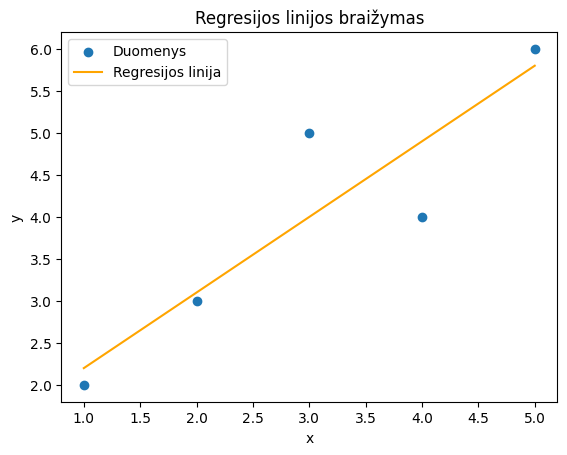

R² reikšmė: 0.8100


In [ ]:
# 1. Paruošiam duomenis
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 3, 5, 4, 6]) 

# 2. Sukuriam ir apmokam regresijos modelį
model = LinearRegression()
model.fit(x, y)  # modelis išmoksta linijos koeficientus

# 3. Sukuriam x reikšmes linijai
x_lin = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_lin = model.predict(x_lin)  # prognozuojam y reikšmes

# 4. Nubraižom tiek taškus, tiek liniją
plt.scatter(x, y, label="Duomenys")
plt.plot(x_lin, y_lin, color='orange', label="Regresijos linija")
plt.title("Regresijos linijos braižymas")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# 5. R²
print(f"R² reikšmė: {model.score(x, y):.4f}")

## Regresijos linijos braižymo paaiškinimas

### Kas parodyta grafike:

- **Mėlyni taškai** – tai tavo duomenys: kiekvienas taškas atitinka (x, y) porą.
- **Oranžinė linija** – tai regresijos linija, nubrėžta pagal linijinę regresiją.
  Ji parodo bendrą tendenciją tarp x ir y kintamųjų.


### Interpretacija:

- Linija nubrėžta taip, kad **minimizuotų kvadratinių paklaidų sumą** tarp prognozuotų ir tikrųjų y reikšmių.
- Ji **neprivalo eiti per visus taškus**, bet turėtų būti „vidurkis“ visų taškų tendencijos atžvilgiu.
- Jei taškai arti linijos – tai rodo gerą modelio tinkamumą.

---

### Praktinis pastebėjimas:

- Jei duomenys išsidėstę gana arti linijos – **R² reikšmė bus artima 1** (modelis geras).
- Jei taškai toli nuo linijos – **R² reikšmė bus maža**, rodanti silpną ryšį.

---

## Pavyzdys 1

Pavyzdys 1 - R²: 1.0000


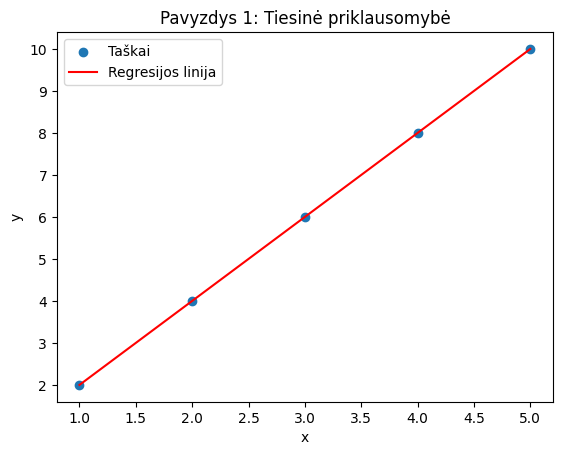

In [3]:
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 6, 8, 10])

model = LinearRegression()
model.fit(x, y)

x_vals_plot = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_vals_plot = model.predict(x_vals_plot)

# R² skaičiavimas
r2 = model.score(x, y)
print(f"Pavyzdys 1 - R²: {r2:.4f}")

plt.scatter(x, y, label="Taškai")
plt.plot(x_vals_plot, y_vals_plot, color='red', label="Regresijos linija")
plt.title("Pavyzdys 1: Tiesinė priklausomybė")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

###  Paaiškinimas: regresijos linijos taškų generavimas

### 1. `np.linspace(x.min(), x.max(), 100)`
x.min() ir x.max() – tai mažiausia ir didžiausia tavo duomenų reikšmė x ašyje.

np.linspace(...) – sukuria 100 tolygiai paskirstytų taškų nuo mažiausios iki didžiausios x reikšmės.

Tai leidžia tau turėti sklandžią, gražią regresijos liniją nuo pradžios iki galo.

### 2. `.reshape(-1, 1)`
np.linspace(...) grąžina 1D masyvą, bet scikit-learn regresijos modelis (model.predict(...)) tikisi 2D formato: stulpelio (n eilučių, 1 stulpelis).

Todėl .reshape(-1, 1) padaro iš x_lin tinkamą formatą.

### 3. `y_lin = model.predict(x_lin)`
Tai iškviečia regresijos modelį, kad jis paskaičiuotų atitinkamas prognozuotas y reikšmes visiems 100 x_lin taškų.

Rezultatas – regresijos linijos taškai.

| Kodas                  | Paskirtis                                    |
| ---------------------- | -------------------------------------------- |
| `np.linspace(...)`     | Sukuria tolygiai pasiskirsčiusius `x` taškus |
| `.reshape(-1, 1)`      | Pavertimas į 2D formatą modelio įvestims     |
| `model.predict(x_lin)` | Apskaičiuoja atitinkamas `y` prognozes       |


## Pavyzdys 2

Pavyzdys 2 - R²: 0.8821


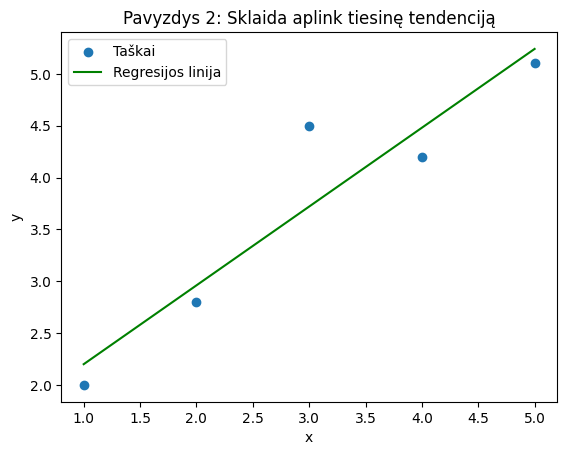

In [13]:
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 2.8, 4.5, 4.2, 5.1])

model = LinearRegression()
model.fit(x, y)

x_vals_plot = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_vals_plot = model.predict(x_vals_plot)

# R² skaičiavimas
r2 = model.score(x, y)
print(f"Pavyzdys 2 - R²: {r2:.4f}")

plt.scatter(x, y, label="Taškai")
plt.plot(x_vals_plot, y_vals_plot, color='green', label="Regresijos linija")
plt.title("Pavyzdys 2: Sklaida aplink tiesinę tendenciją")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Išvada
- Visuose pavyzdžiuose buvo naudojami visi turimi duomenys be train/test dalinimo.

- Tokiu atveju galima tiesiogiai braižyti regresijos liniją, kas labai patogu vizualizacijoms ar mokymuisi.

- Tačiau jei norime vertinti modelio kokybę ar daryti prognozes realiems duomenims, tuomet train/test dalinimas tampa svarbus.

- R² koeficientas leidžia įvertinti, kiek gerai modelis paaiškina duomenų variaciją.


In [6]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Įkeliame duomenis
data = load_diabetes()
X = data.data  # savybės (features)
y = data.target  # tikslinės reikšmės (kraujo cukraus lygis)

# Naudosime tik 1 požymį (pvz. BMI) kad būtų galima braižyti
X_single = X[:, np.newaxis, 2]  # 3-ias požymis: kūno masės indeksas

# Sukuriam modelį
model = LinearRegression()
model.fit(X_single, y)

# Prognozės
x_vals = np.linspace(X_single.min(), X_single.max(), 100).reshape(-1, 1)
y_vals = model.predict(x_vals)

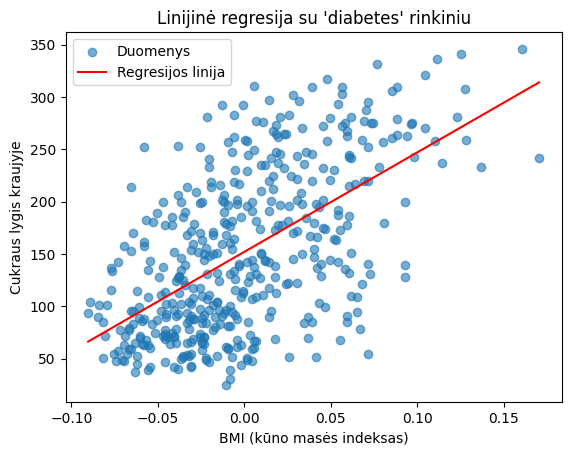

In [8]:
# Braižome
plt.scatter(X_single, y, label='Duomenys', alpha=0.6)
plt.plot(x_vals, y_vals, color='red', label='Regresijos linija')
plt.xlabel("BMI (kūno masės indeksas)")
plt.ylabel("Cukraus lygis kraujyje")
plt.title("Linijinė regresija su 'diabetes' rinkiniu")
plt.legend()
plt.show()

In [9]:
# R²
r2 = model.score(X_single, y)
print(f"R² reikšmė: {r2:.4f}")

R² reikšmė: 0.3439


In [10]:
# Generuojam duomenis be jokio ryšio tarp x ir y
np.random.seed(42)  # kad būtų atkartojama
x = np.random.rand(50) * 10  # nuo 0 iki 10
y = np.random.rand(50) * 100  # visiškai atsitiktiniai y

x = x.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)

# Prognozuota linija
x_vals = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_vals = model.predict(x_vals)

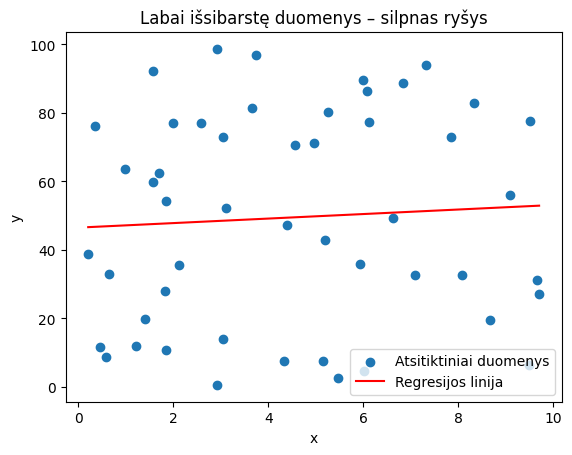

In [11]:
# Braižymas
plt.scatter(x, y, label="Atsitiktiniai duomenys")
plt.plot(x_vals, y_vals, color='red', label="Regresijos linija")
plt.title("Labai išsibarstę duomenys – silpnas ryšys")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [12]:
# R²
r2 = model.score(x, y)
print(f"R² reikšmė: {r2:.4f}")

R² reikšmė: 0.0039
